In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

# Feature choosing

In [2]:
acronyms = {"Rk": "Rank", "Player": "Player's name", "Nation": "Player's nation", "Pos": "Position",
            "Squad": "Squad’s name", "Comp": "League that squat occupies", "Age": "Player's age",
            "Born": "Year of birth", "MP": "Matches played", "Starts": "Matches started",
            "Min": "Minutes played", "90s": "Minutes played divided by 90", 
            "Goals": "Goals scored or allowed", 
            "Shots": "Shots total (Does not include penalty kicks)", 
            "SoT": "Shots on target (Does not include penalty kicks)", 
            'SoT%': 'Shots on target percentage (Does not include penalty kicks)',
            'G/Sh': 'Goals per shot', 
            'G/SoT': 'Goals per shot on target (Does not include penalty kicks)', 
            'ShoDist': 'Average distance, in yards, from goal of all shots taken (Does not include penalty kicks)',
            'ShoFK': 'Shots from free kicks', 
            'ShoPK': 'Penalty kicks made',
            "PasProg":"Completed passes that move the ball towards the opponent's goal at least 10 yards from its furthest point in the last six passes, or any completed pass into the penalty area",
                  "PasAtt":"Passes attempted",
                  "PasLive":"Live-ball passes",
                  "PasDead":"Dead-ball passes",
                  "PasFK":"Passes attempted from free kicks",
                  "TB":"Completed pass sent between back defenders into open space",
                  "Sw":"Passes that travel more than 40 yards of the width of the pitch",
                  "PasCrs":"Crosses",
                  "TI":"Throw-Ins taken",
                  "CK":"Corner kicks",
                  "CkIn":"Inswinging corner kicks",
                  "CkOut":"Outswinging corner kicks",
                  "CkStr":"Straight corner kicks",
                  "PasCmp":"Passes completed",
                  "PasOff":"Offsides",
                  "PasBlocks":"Blocked by the opponent who was standing it the path",
                  "SCA":"Shot-creating actions",
                  "ScaPassLive":"Completed live-ball passes that lead to a shot attempt",
                  "ScaPassDead":"Completed dead-ball passes that lead to a shot attempt",
                  "ScaDrib":"Successful dribbles that lead to a shot attempt",
                  "ScaSh":"Shots that lead to another shot attempt",
                  "ScaFld":"Fouls drawn that lead to a shot attempt",
                  "ScaDef":"Defensive actions that lead to a shot attempt",
                  "GCA":"Goal-creating actions",
                  "GcaPassLive":"Completed live-ball passes that lead to a goal",
                  "GcaPassDead":"Completed dead-ball passes that lead to a goal",
                  "GcaDrib":"Successful dribbles that lead to a goal",
                  "GcaSh":"Shots that lead to another goal-scoring shot",
                  "GcaFld":"Fouls drawn that lead to a goal",
                  "GcaDef":"Defensive actions that lead to a goal",
                  "Tkl":"Number of players tackled",
                  "TklWon":"Tackles in which the tackler's team won possession of the ball",
                  "TklDef3rd":"Tackles in defensive 1/3",
                  "TklMid3rd":"Tackles in middle 1/3",
                  "TklAtt3rd":"Tackles in attacking 1/3",
                  "TklDri":"Number of dribblers tackled",
                  "TklDriAtt":"Number of times dribbled past plus number of tackles",
                  "TklDri%":"Percentage of dribblers tackled",
                  "TklDriPast":"Number of times dribbled past by an opposing player",
                  "Blocks":'Number of times blocking the ball by standing in its path',
                 'BlkSh':'Number of times blocking a shot by standing in its path',
            'PKatt': 'Penalty kicks attempted', 
            'PasTotCmp': 'Passes completed', 
            'PasTotAtt': 'Passes attempted', 
            'PasTotCmp%': 'Pass completion percentage', 
            'PasTotDist': 'Total distance, in yards, that completed passes have traveled in any direction',
            'PasTotPrgDist': 'Total distance, in yards, that completed passes have traveled towards the opponent\'s goal',
            'PasShoCmp': 'Passes completed (Passes between 5 and 15 yards)', 
            'PasShoAtt': 'Passes attempted (Passes between 5 and 15 yards)', 
            'PasShoCmp%': 'Pass completion percentage (Passes between 5 and 15 yards)',
            'PasMedCmp': 'Passes completed (Passes between 15 and 30 yards)', 
            'PasMedAtt': 'Passes attempted (Passes between 15 and 30 yards)', 
            'PasMedCmp%': 'Pass completion percentage (Passes between 15 and 30 yards)',
            'PasLonCmp': 'Passes completed (Passes longer than 30 yards)', 
            'PasLonAtt': 'Passes attempted (Passes longer than 30 yards)', 
            'PasLonCmp%': 'Pass completion percentage (Passes longer than 30 yards)',
            'Assists': 'Assists', 
            'PasAss': 'Passes that directly lead to a shot (assisted shots)', 
            'Pas3rd': 'Completed passes that enter the 1/3 of the pitch closest to the goal',
             "PPA" : "Completed passes into the 18-yard box",
            "CrsPA" : "Completed crosses into the 18-yard box",
           "BlkPass":"Number of times blocking a pass by standing in its path",
                  "Int":"Interceptions",
                  "Tkl+Int":"Number of players tackled plus number of interceptions",
                  "Clr":"Clearances",
                  "Err":"Mistakes leading to an opponent's shot",
                  "Touches":"Number of times a player touched the ball. Note: Receiving a pass, then dribbling, then sending a pass counts as one touch",
                  "TouDefPen":"Touches in defensive penalty area",
                  "TouDef3rd":"Touches in defensive 1/3",
                  "TouMid3rd":"Touches in middle 1/3",
                  "TouAtt3rd":"Touches in attacking 1/3",
                  "TouAttPen":"Touches in attacking penalty area",
                  "TouLive":"Live-ball touches. Does not include corner kicks, free kicks, throw-ins, kick-offs, goal kicks or penalty kicks.",
                  "ToAtt":"Number of attempts to take on defenders while dribbling",
                  "ToSuc":"Number of defenders taken on successfully, by dribbling past them",
                  "ToSuc%":"Percentage of take-ons Completed Successfully",
                  "ToTkl":"Number of times tackled by a defender during a take-on attempt",
                  "ToTkl%":"Percentage of time tackled by a defender during a take-on attempt",
                  "Carries":"Number of times the player controlled the ball with their feet",
                  "CarTotDist":"Total distance, in yards, a player moved the ball while controlling it with their feet, in any direction",
                  "CarPrgDist":"Total distance, in yards, a player moved the ball while controlling it with their feet towards the opponent's goal",
                  "CarProg":"Carries that move the ball towards the opponent's goal at least 5 yards, or any carry into the penalty area",
                  "Car3rd":"Carries that enter the 1/3 of the pitch closest to the goal",
                  "CPA":"Carries into the 18-yard box",
                  "CarMis":"Number of times a player failed when attempting to gain control of a ball",
                  "CarDis":"Number of times a player loses control of the ball after being tackled by an opposing player",
                  "Rec":"Number of times a player successfully received a pass",
           "RecProg" : 
            "Completed passes that move the ball towards the opponents goal at least 10 yards from its furthest point in the last six passes, or any completed pass into the penalty area Make this a dictionary",
           "CrdY":"Yellow cards",
                  "CrdR":"Red cards",
                  "2CrdY":"Second yellow card",
                  "Fls":"Fouls committed",
                  "Fld":"Fouls drawn",
                  "Off":"Offsides",
                  "Crs":"Crosses",
                  "TklW":"Tackles in which the tackler's team won possession of the ball",
                  "PKwon":"Penalty kicks won",
                  "PKcon":"Penalty kicks conceded",
                  "OG":"Own goals",
                  "Recov":"Number of loose balls recovered",
                  "AerWon":"Aerials won",
                  "AerLost":"Aerials lost",
                  "AerWon%":"Percentage of aerials won",
           }


In [3]:
general_info = ["Player", "Nation", "Pos", "Squad", "Age", "Born"]
playing_time = ["MP", "Starts", "Min"]
goals_info = ["Goals", "Shots", "SoT", "G/Sh", "G/SoT", "ShoDist", "ShoPK", "PKatt", "GCA", 
              "SCA", "Off", "PKwon", "PKcon"]

passes_info = ["PasTotCmp", "PasTotDist", "PasTotPrgDist", "Assists", 
               "PasAss", "Pas3rd", "PPA", "PasCrs", "CrsPA", "PasAtt", "PasLive", "PasDead", "PasOff",
              "PasBlocks", "Crs"]
skill_info = ["SCA", "ScaDrib", "ScaFld", "ToAtt", "ToSuc", "Carries", "CarTotDist", "CarPrgDist", "Car3rd", 'CPA', "CarMis", "CarDis", "Fld"]
defense_info = ["Tkl", "TklWon", "TklDri", "Blocks", "Int", "Clr", "Err", "CrdY", "CrdR", "Fls", "OG", "Recov", "AerWon", 
             "AerLost"]

In [4]:
goals_bestfeatures = ["Goals", "Shots", "SoT"]
passes_bestfeatures = ["PasTotCmp", "Assists"]
skill_bestfeatures = ["SCA", "ScaDrib"]
defense_bestfeatures = ["Tkl", "Int"]

In [5]:
forward_features = ["Goals", "Shots", "SoT", "G/Sh", "G/SoT", "ShoDist", "PKatt", "GCA", "SCA", "Off", "PKwon", "PKcon", "ScaDrib", 
                    "ScaPassLive", "Car3rd", "Fld"]
midfielder_features = ["PasTotCmp", "PasTotCmp%", "PasTotDist", "PasTotPrgDist", "Assists", "PasAss", "Pas3rd", "Crs", "PasCmp", 
                       "PasOff", "PasBlocks", "SCA", "ScaPassLive", "ScaPassDead", "ScaDrib", "ScaSh", "ScaFld", "GCA", "GcaPassLive", 
                       "GcaPassDead", "GcaDrib", "GcaSh", "GcaFld", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri", 
                       "TklDriAtt", "TklDri%", "TklDriPast", "Blocks", "BlkSh", "Int", "Recov"]
defender_features = ["Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri", "TklDriAtt", "TklDri%", "TklDriPast", "Blocks", 
                     "BlkSh", "Int", "Recov", "AerWon", "AerLost", "AerWon%"]

In [6]:
forward_features_sum = ["Goals", "Shots", "SoT", "PKatt", "GCA", "SCA", "Off", "PKwon", "PKcon", "ScaDrib", 
                    "ScaPassLive", "Car3rd", "Fld"]
forward_features_max = ["G/Sh", "G/SoT", "ShoDist"]
midfielder_features_sum = ["PasTotCmp", "PasTotDist", "PasTotPrgDist", "Assists", "PasAss", "Pas3rd", "Crs", "PasCmp", 
                       "PasOff", "PasBlocks", "SCA", "ScaPassLive", "ScaPassDead", "ScaDrib", "ScaSh", "ScaFld", "GCA", "GcaPassLive", 
                       "GcaPassDead", "GcaDrib", "GcaSh", "GcaFld", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri", 
                       "TklDriAtt", "TklDriPast", "Blocks", "BlkSh", "Int", "Recov"]
midfielder_features_max = ["PasTotCmp%", "TklDri%"]
defender_features_sum = ["Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri", "TklDriAtt", "TklDri%", "TklDriPast", "Blocks", 
                     "BlkSh", "Int", "Recov", "AerWon", "AerLost", "AerWon%"]
defender_features_max = ["AerWon%"]

# Data preprocessing

In [7]:
df_2022 = pd.read_csv("/kaggle/input/20222023-football-player-stats/2022-2023 Football Player Stats.csv", encoding='ISO-8859-1', delimiter=';')

In [8]:
def player_unify(df):
    
    all_players = list(df["Player"].values)
    columns = list(df.columns)
    sum_list = forward_features_sum + midfielder_features_sum + defender_features_sum
    max_list = forward_features_max + midfielder_features_max + defender_features_max
    
    playercnt_dict = {}
    for i in range(len(all_players)):
        if all_players[i] not in playercnt_dict.keys():
            playercnt_dict[all_players[i]] = 1
        else:
            playercnt_dict[all_players[i]] += 1
            
    player_switchclub = []
    for x in playercnt_dict.keys():
        if playercnt_dict[x] >= 2:
            player_switchclub.append(x)
            
    player_new_dict = {}
    df_result = df
    for i in range(len(player_switchclub)):
        player_new = []
        player_old = df[df["Player"] == player_switchclub[i]].values
        for j in range(len(columns)):
            if columns[j] == "Squad":
                new_input = []
                for k in range(player_old.shape[0]):
                    new_input.append(player_old[k, j])
                player_new.append(new_input)
            elif columns[j] in sum_list:
                new_input = 0
                for k in range(player_old.shape[0]):
                    new_input += player_old[k, j]
                player_new.append(new_input)
            elif columns[j] in max_list:
                new_input = []
                for k in range(player_old.shape[0]):
                    new_input.append(player_old[k, j])
                player_new.append(max(new_input))
            else:
                player_new.append(player_old[0, j])
        player_new_dict[player_switchclub[i]] = player_new
        df_result = df_result.drop(df_result[df_result['Player'] == player_switchclub[i]].index)
    df_unify = pd.DataFrame(player_new_dict)
    df_unify = df_unify.transpose().reset_index(drop=True)
    df_unify.columns = columns
    df_result = pd.concat([df_result, df_unify], axis=0)
    
    return df_result

In [9]:
df_players = player_unify(df_2022)
df_players = df_players.reset_index()
df_players.drop("index", axis=1, inplace=True)
del df_2022

In [10]:
scaler = MinMaxScaler()
df_radar = scaler.fit_transform(df_players[goals_info + passes_info + skill_info + defense_info + ['AerWon%', 'PasTotCmp%', 'PasCmp', 'ScaPassLive', 'ScaPassDead', 'ScaSh', 'GcaPassLive', 'GcaPassDead', 'GcaDrib', 'GcaSh', 'GcaFld', 'TklDef3rd', 'TklMid3rd', 'TklAtt3rd', 'TklDriAtt', 'TklDri%', 'TklDriPast', 'BlkSh']])
df_players.drop(["Rk"], axis=1, inplace=True)
df_radar = pd.concat([df_players[["Player", 'MP', 'Starts', 'Min']], pd.DataFrame(df_radar)], axis=1)
df_radar.columns = ["Player", 'MP', 'Starts', 'Min'] + goals_info + passes_info + skill_info + defense_info + ['AerWon%', 'PasTotCmp%', 'PasCmp', 'ScaPassLive', 'ScaPassDead', 'ScaSh', 'GcaPassLive', 'GcaPassDead', 'GcaDrib', 'GcaSh', 'GcaFld', 'TklDef3rd', 'TklMid3rd', 'TklAtt3rd', 'TklDriAtt', 'TklDri%', 'TklDriPast', 'BlkSh']

In [11]:
all_players = list(df_players["Player"].values)
all_leagues = list(np.unique(df_players["Comp"].values))
all_positions = list(np.unique(df_players["Pos"].values))

# Modeling

In [12]:
from sklearn.cluster import KMeans
km_striker = KMeans(n_clusters=5)
km_midfield = KMeans(n_clusters=5)
km_defender = KMeans(n_clusters=5)
km_gk = KMeans(n_clusters=5)

In [13]:
def kmeans_position(df, position, cluster, features):
    '''
    Train a KMeans model to cluster players at each position
    '''
    kmeans = KMeans(n_clusters=cluster, n_init=10, random_state=1)
    df_position = df_players[(df_players["Pos"]==position)]
    kmeans.fit(df_position.iloc[:, 6:][features])
    position_pred = kmeans.predict(df_position.iloc[:, 6:][features])
    df_position.loc[:,"Class"] = position_pred
    return df_position

def kmeans_general_position(df, general_position, cluster, features):
    '''
    Train a KMeans model to cluster players at each general position
    like striker, midfield, defender, or goalkeeper
    '''
    df_positions = []

    for i in range(len(general_position)):
        df_position = kmeans_position(df, general_position[i], cluster, features)
        df_positions.append(df_position)
    return df_positions

In [14]:
forward_position = ["FW", "FWMF", "FWDF"]
midfield_position = ["MF", "MFDF", "MFFW"]
defender_position = ["DF", "DFMF", "DFFW"]
gk_position = ["GK"]

In [15]:
df_striker = kmeans_general_position(df_players, forward_position, 5, forward_features + playing_time)
df_midfield = kmeans_general_position(df_players, midfield_position, 5, midfielder_features + playing_time)
df_defender = kmeans_general_position(df_players, defender_position, 5, defender_features + playing_time)
df_gk = kmeans_general_position(df_players, gk_position, 5, list(df_players.columns)[6:])

/tmp/ipykernel_21/994572580.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_position.loc[:,"Class"] = position_pred
/tmp/ipykernel_21/994572580.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_position.loc[:,"Class"] = position_pred
/tmp/ipykernel_21/994572580.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [16]:
df_striker = pd.concat(df_striker, axis=0)
df_midfield = pd.concat(df_midfield, axis=0)
df_defender = pd.concat(df_defender, axis=0)
df_gk = pd.concat(df_gk, axis=0)

In [17]:
df_players = pd.concat([df_striker, df_midfield, df_defender, df_gk], axis=0)

In [18]:
class_column = []
position_column = []
for i in range(df_radar.shape[0]):
    class_column.append(df_players[df_players["Player"] == df_radar.iloc[i,0]]["Class"].values[0])
    position_column.append(df_players[df_players["Player"] == df_radar.iloc[i,0]]["Pos"].values[0])

In [19]:
df_radar["Class"] = class_column
df_radar["Pos"] = position_column

In [20]:
del df_striker
del df_midfield
del df_defender
del df_gk

In [21]:
df_players.to_csv("players.csv")

In [22]:
df_radar.to_csv("radar.csv")

# EDA

In [23]:
import matplotlib.pyplot as plt

def plot_class(position, features, playing_time, max_value, df):
    for i in range(len(position)):
        fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(50,10))
        for j in range(5):
            data = df[(df["Class"] == j) & (df["Pos"] == position[i])][features].mean()
            axes[j].bar(data.index, data.values)
            axes[j].set_xticks(range(len(data)))
            axes[j].set_xticklabels(data.index, rotation=90)
            axes[j].set_title(position[i] + " vs " + str(j))
            axes[j].set_yticks(range(max_value))
            print("-")
            print(df[(df["Class"] == j) & (df["Pos"] == position[i])][playing_time].mean())
            print("-")
        plt.show()

-
MP         2.860656
Starts     0.442623
Min       65.524590
dtype: float64
-
-
MP          18.016393
Starts      13.557377
Min       1155.934426
dtype: float64
-
-
MP         10.901408
Starts      3.859155
Min       388.929577
dtype: float64
-
-
MP          20.076923
Starts      18.769231
Min       1609.134615
dtype: float64
-
-
MP         15.426471
Starts      8.647059
Min       781.441176
dtype: float64
-


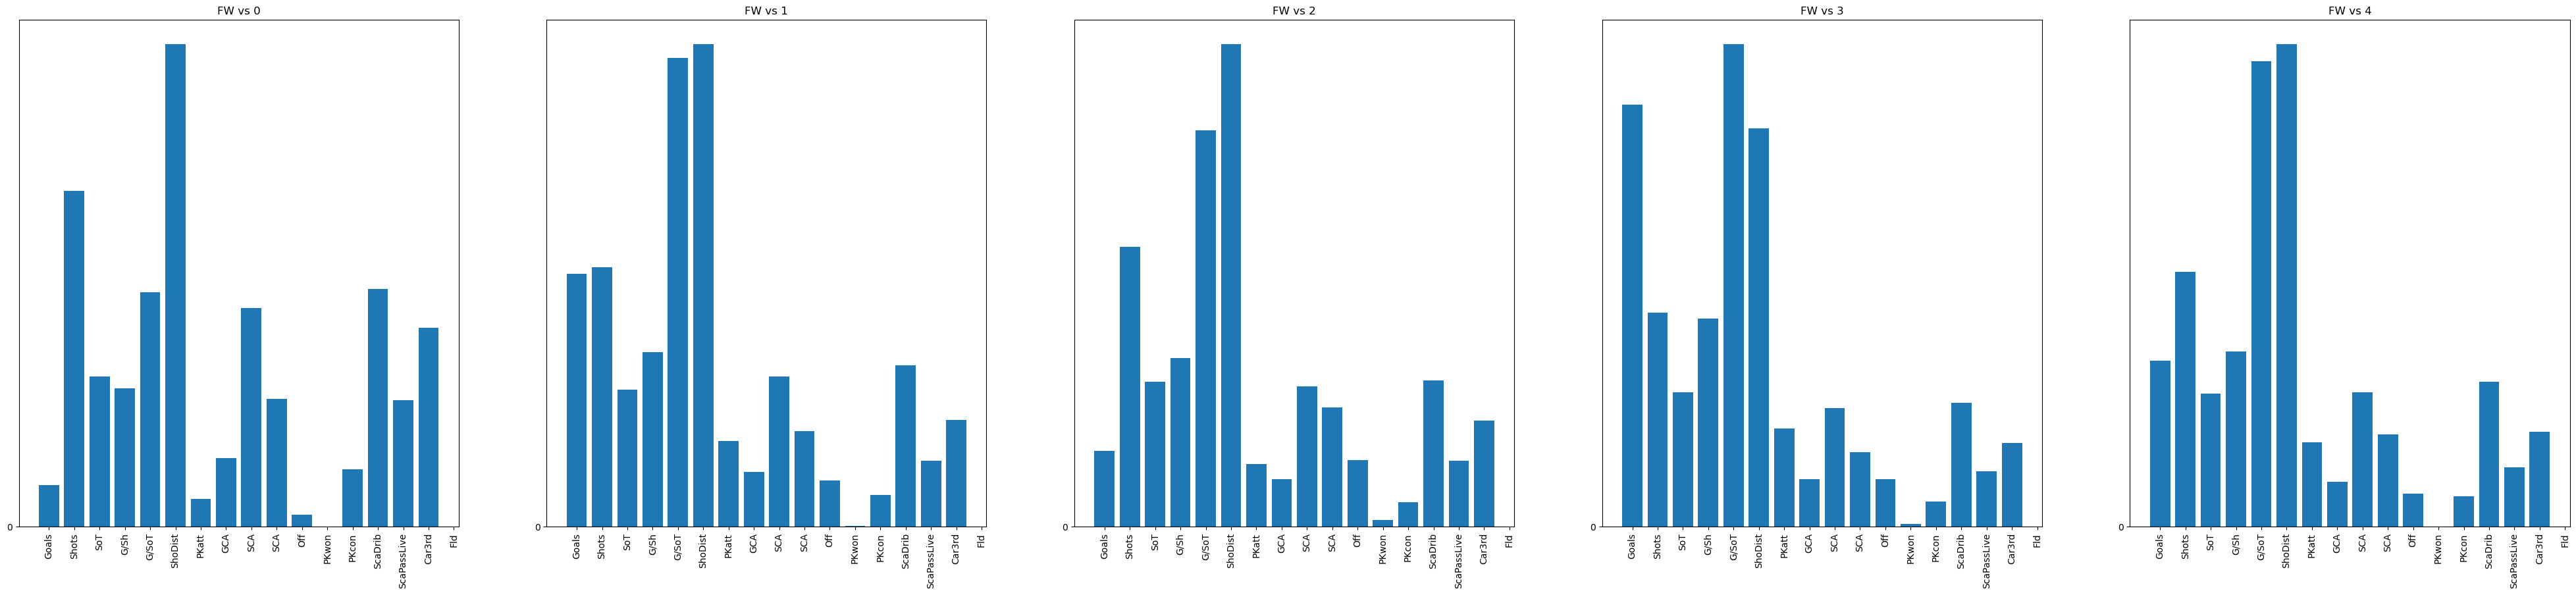

-
MP          18.666667
Starts      13.848485
Min       1198.242424
dtype: float64
-
-
MP         13.245283
Starts      4.566038
Min       475.679245
dtype: float64
-
-
MP         15.921053
Starts      9.736842
Min       871.500000
dtype: float64
-
-
MP          20.00
Starts      18.52
Min       1572.48
dtype: float64
-
-
MP          6.025974
Starts      0.766234
Min       129.922078
dtype: float64
-


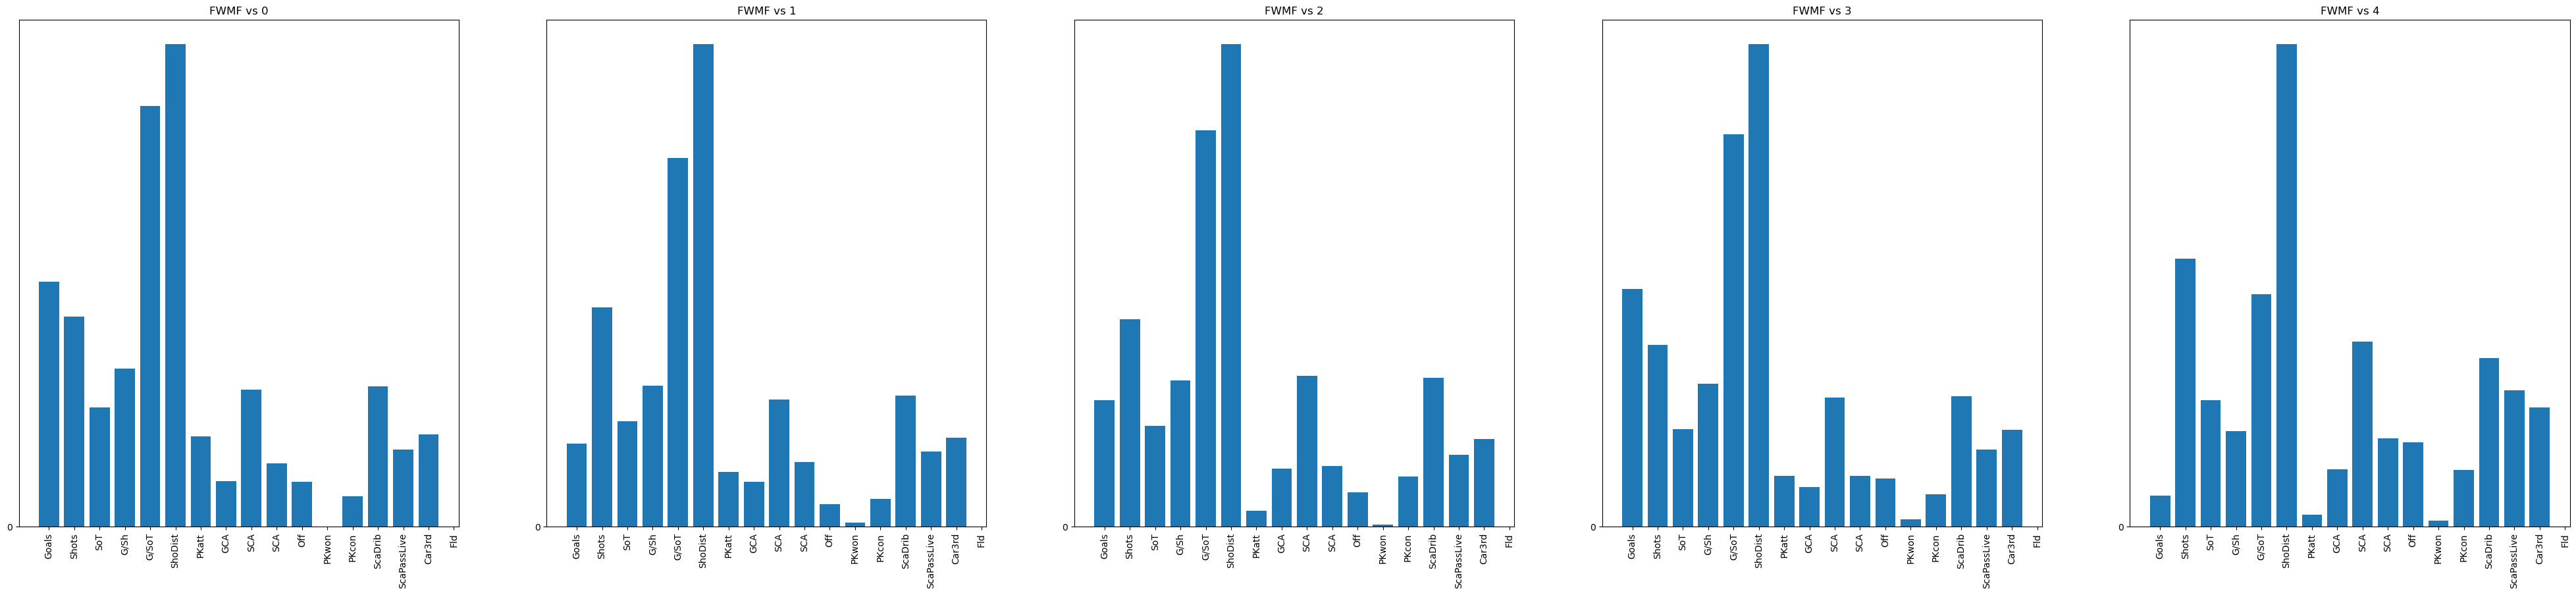

-
MP          9.333333
Starts      3.666667
Min       391.333333
dtype: float64
-
-
MP          20.666667
Starts      20.666667
Min       1721.000000
dtype: float64
-
-
MP          17.0
Starts      11.8
Min       1006.0
dtype: float64
-
-
MP         5.230769
Starts     0.384615
Min       75.769231
dtype: float64
-
-
MP         15.0
Starts      6.0
Min       602.0
dtype: float64
-


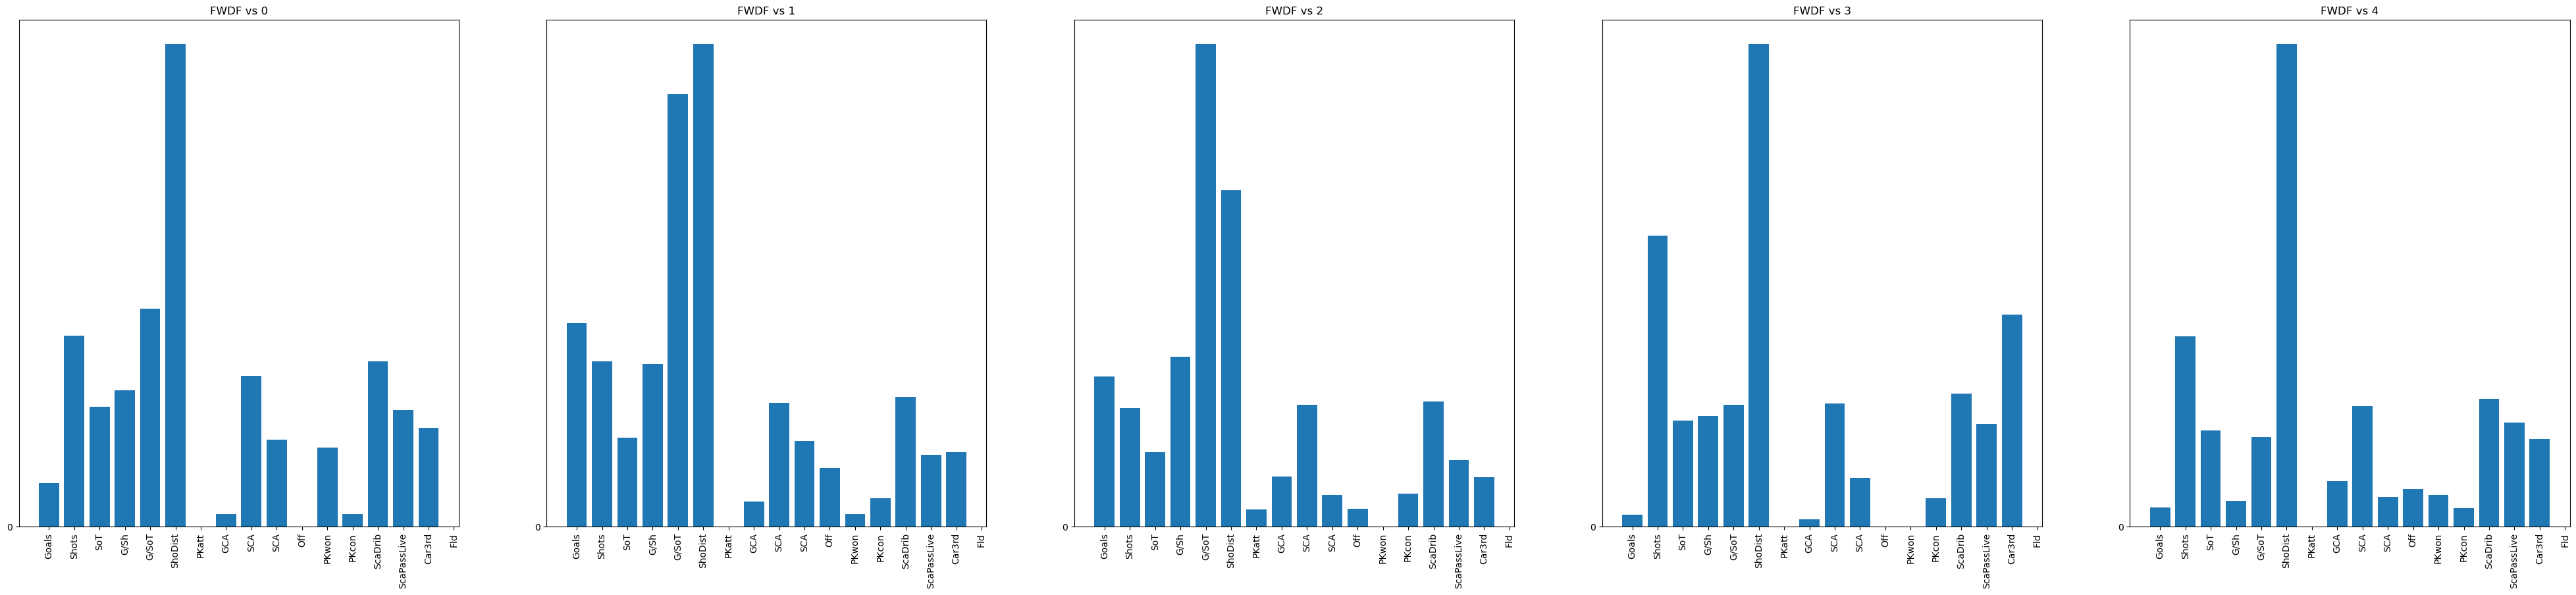

In [24]:
plot_class(forward_position, forward_features, playing_time, 1, df_radar)

-
MP          19.581081
Starts      18.027027
Min       1554.689189
dtype: float64
-
-
MP          4.913043
Starts      1.490683
Min       159.652174
dtype: float64
-
-
MP         15.893082
Starts     10.578616
Min       914.830189
dtype: float64
-
-
MP          7.928571
Starts      4.857143
Min       442.214286
dtype: float64
-
-
MP          6.247059
Starts      2.129412
Min       222.447059
dtype: float64
-


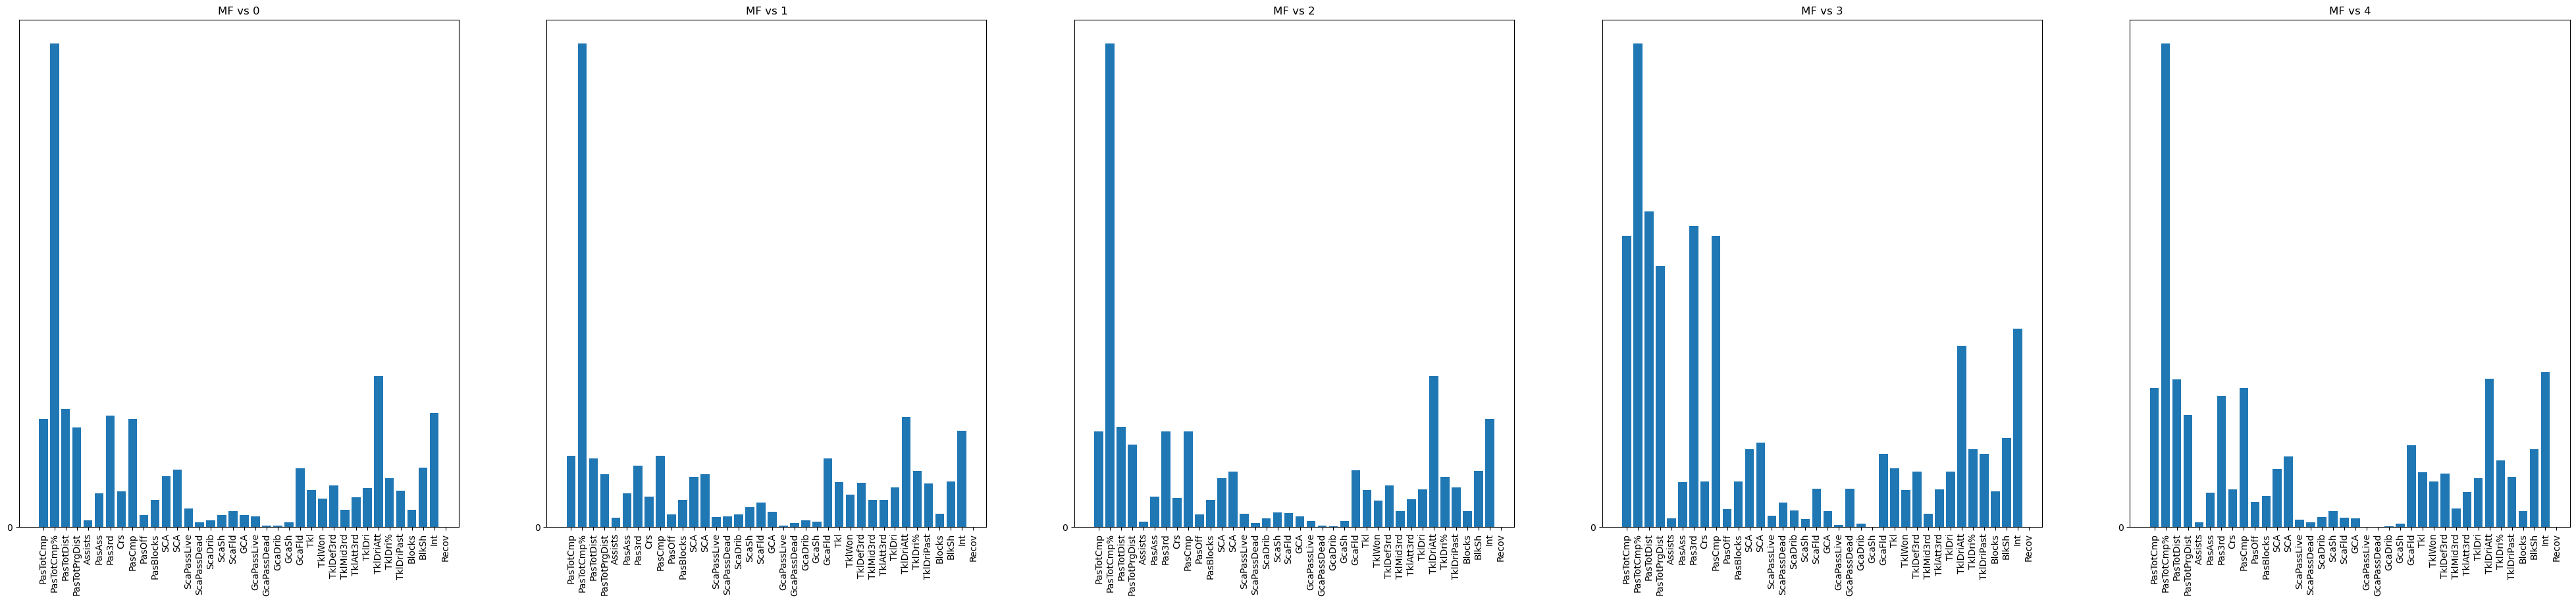

-
MP         3.666667
Starts     0.166667
Min       55.333333
dtype: float64
-
-
MP         16.000000
Starts     10.666667
Min       943.666667
dtype: float64
-
-
MP          6.428571
Starts      1.523810
Min       184.571429
dtype: float64
-
-
MP          20.6
Starts      17.0
Min       1490.3
dtype: float64
-
-
MP         12.888889
Starts      6.222222
Min       610.888889
dtype: float64
-


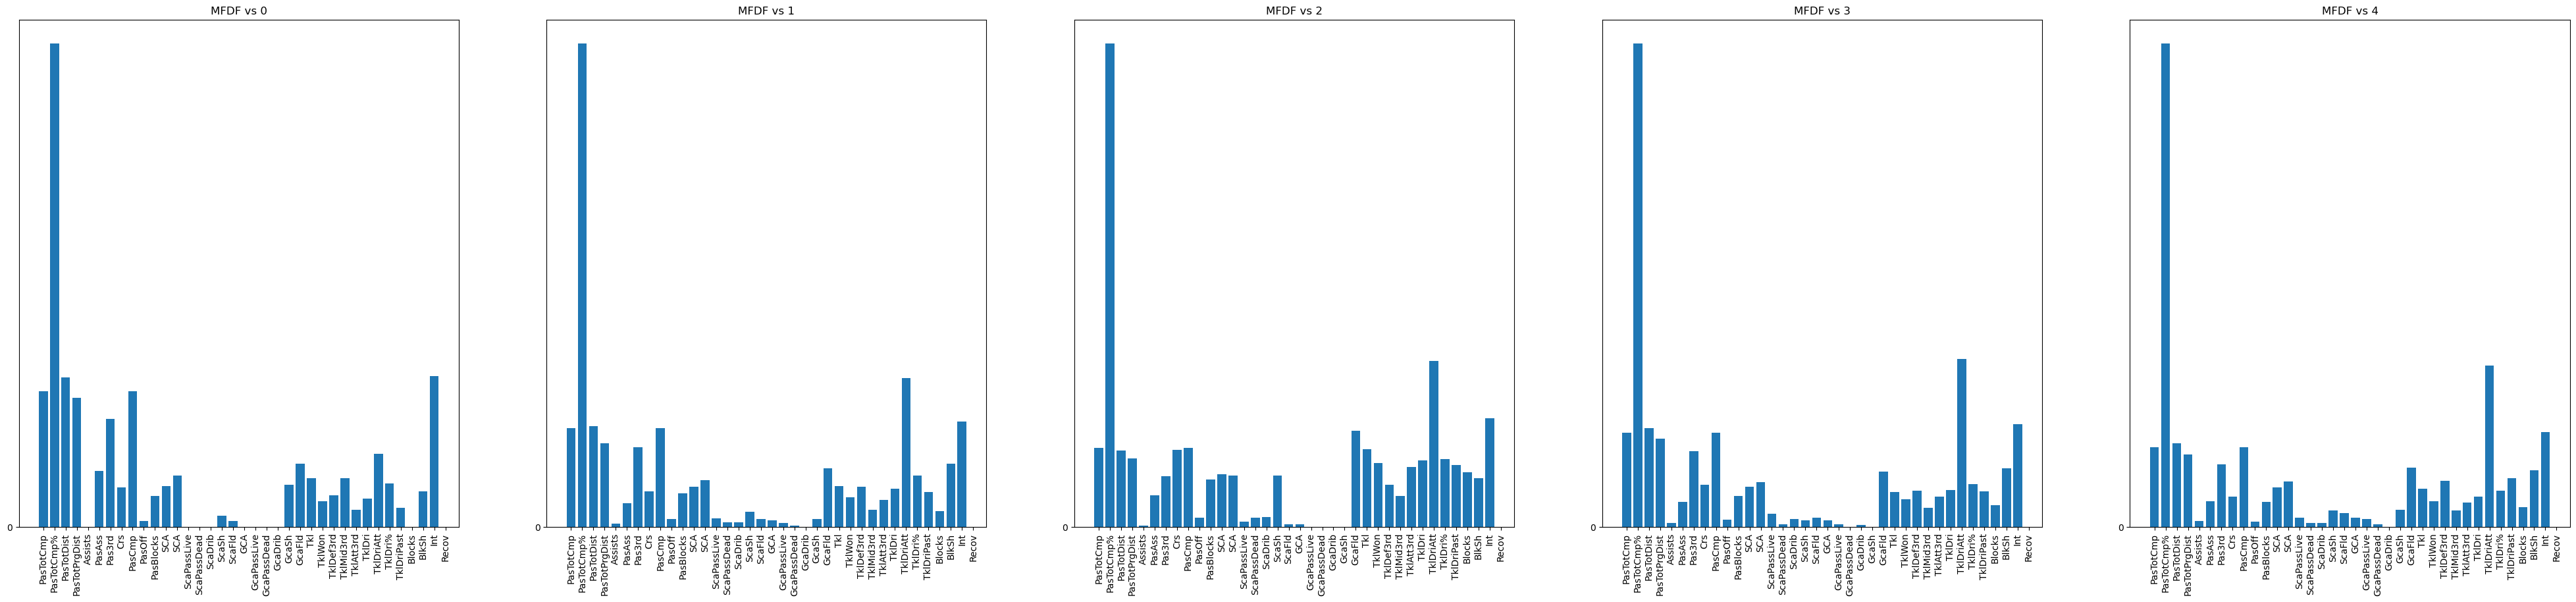

-
MP          6.000000
Starts      0.901639
Min       150.475410
dtype: float64
-
-
MP          18.736842
Starts      14.289474
Min       1217.921053
dtype: float64
-
-
MP         14.688525
Starts      7.163934
Min       671.213115
dtype: float64
-
-
MP          5.133333
Starts      1.066667
Min       135.733333
dtype: float64
-
-
MP          20.391304
Starts      18.739130
Min       1602.260870
dtype: float64
-


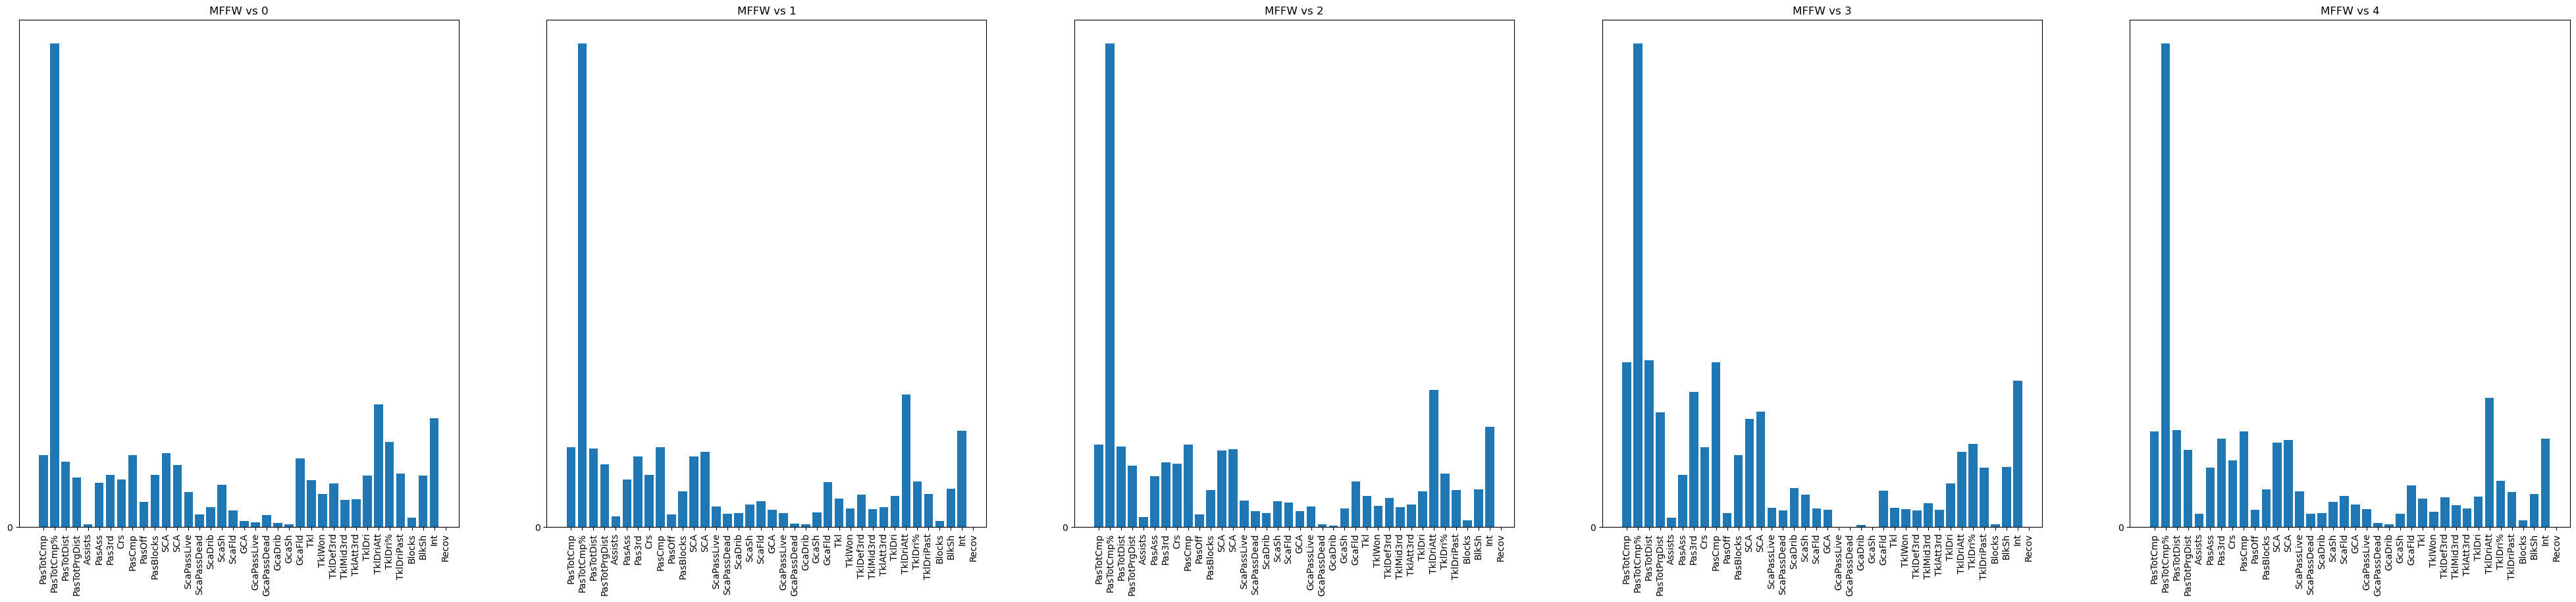

In [25]:
plot_class(midfield_position, midfielder_features, playing_time, 1, df_radar)

-
MP         13.459854
Starts     10.467153
Min       932.868613
dtype: float64
-
-
MP          20.102941
Starts      19.595588
Min       1737.500000
dtype: float64
-
-
MP          2.893048
Starts      1.213904
Min       126.470588
dtype: float64
-
-
MP          16.747191
Starts      14.977528
Min       1307.426966
dtype: float64
-
-
MP          8.939189
Starts      5.554054
Min       524.871622
dtype: float64
-


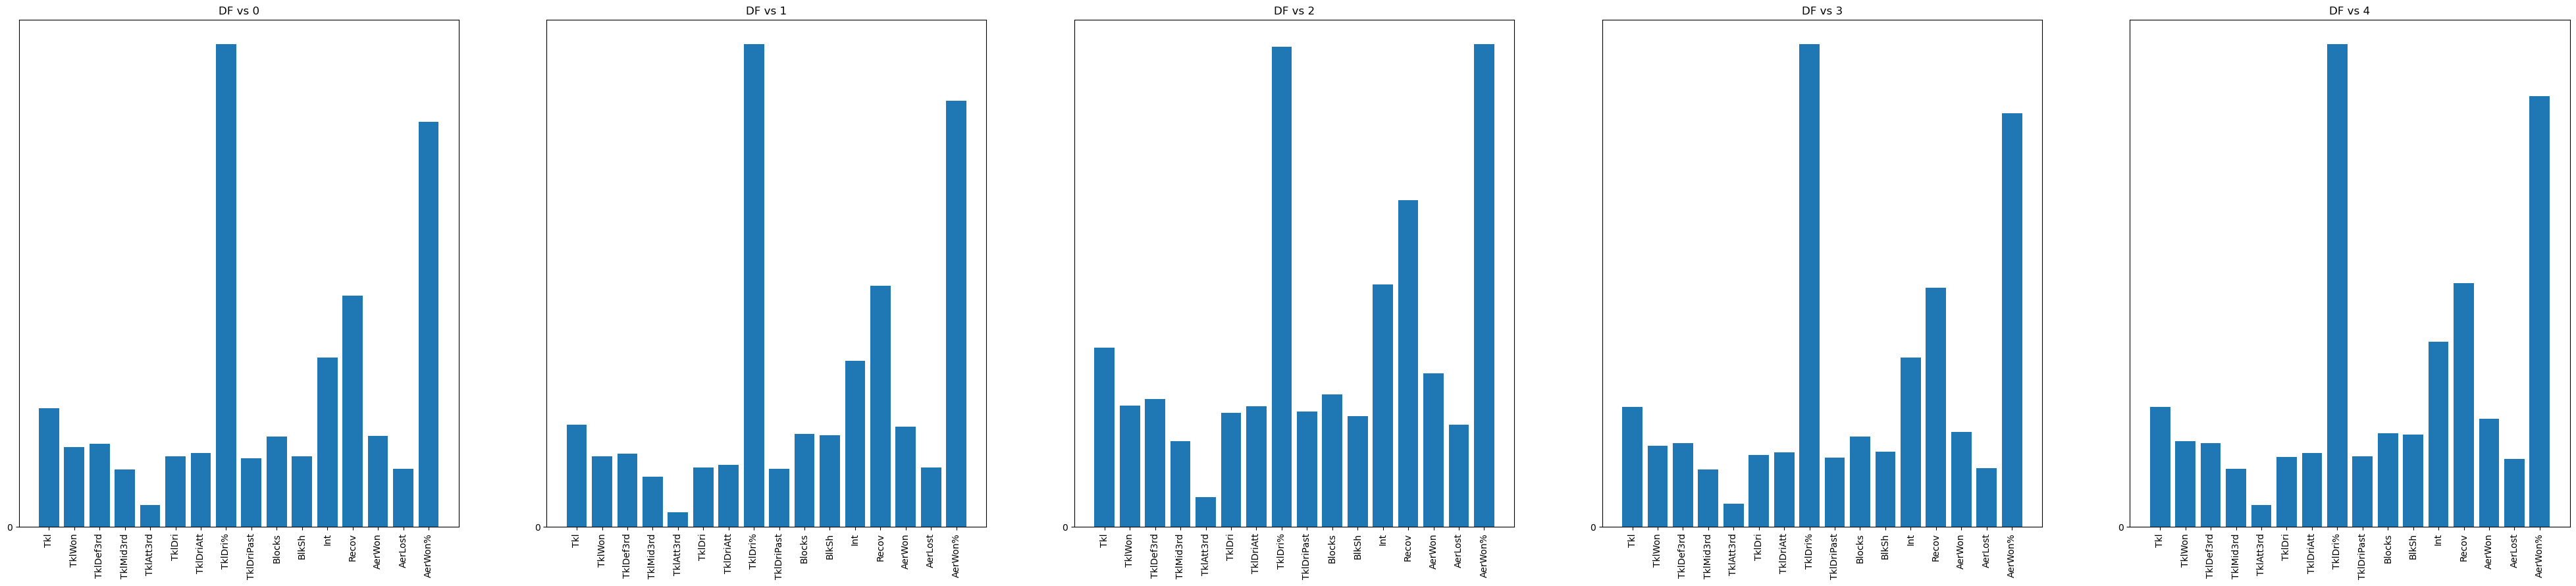

-
MP          5.115385
Starts      0.730769
Min       118.500000
dtype: float64
-
-
MP          19.666667
Starts      17.388889
Min       1541.111111
dtype: float64
-
-
MP         13.333333
Starts      6.933333
Min       690.133333
dtype: float64
-
-
MP          16.333333
Starts      12.277778
Min       1063.555556
dtype: float64
-
-
MP          9.947368
Starts      4.157895
Min       432.157895
dtype: float64
-


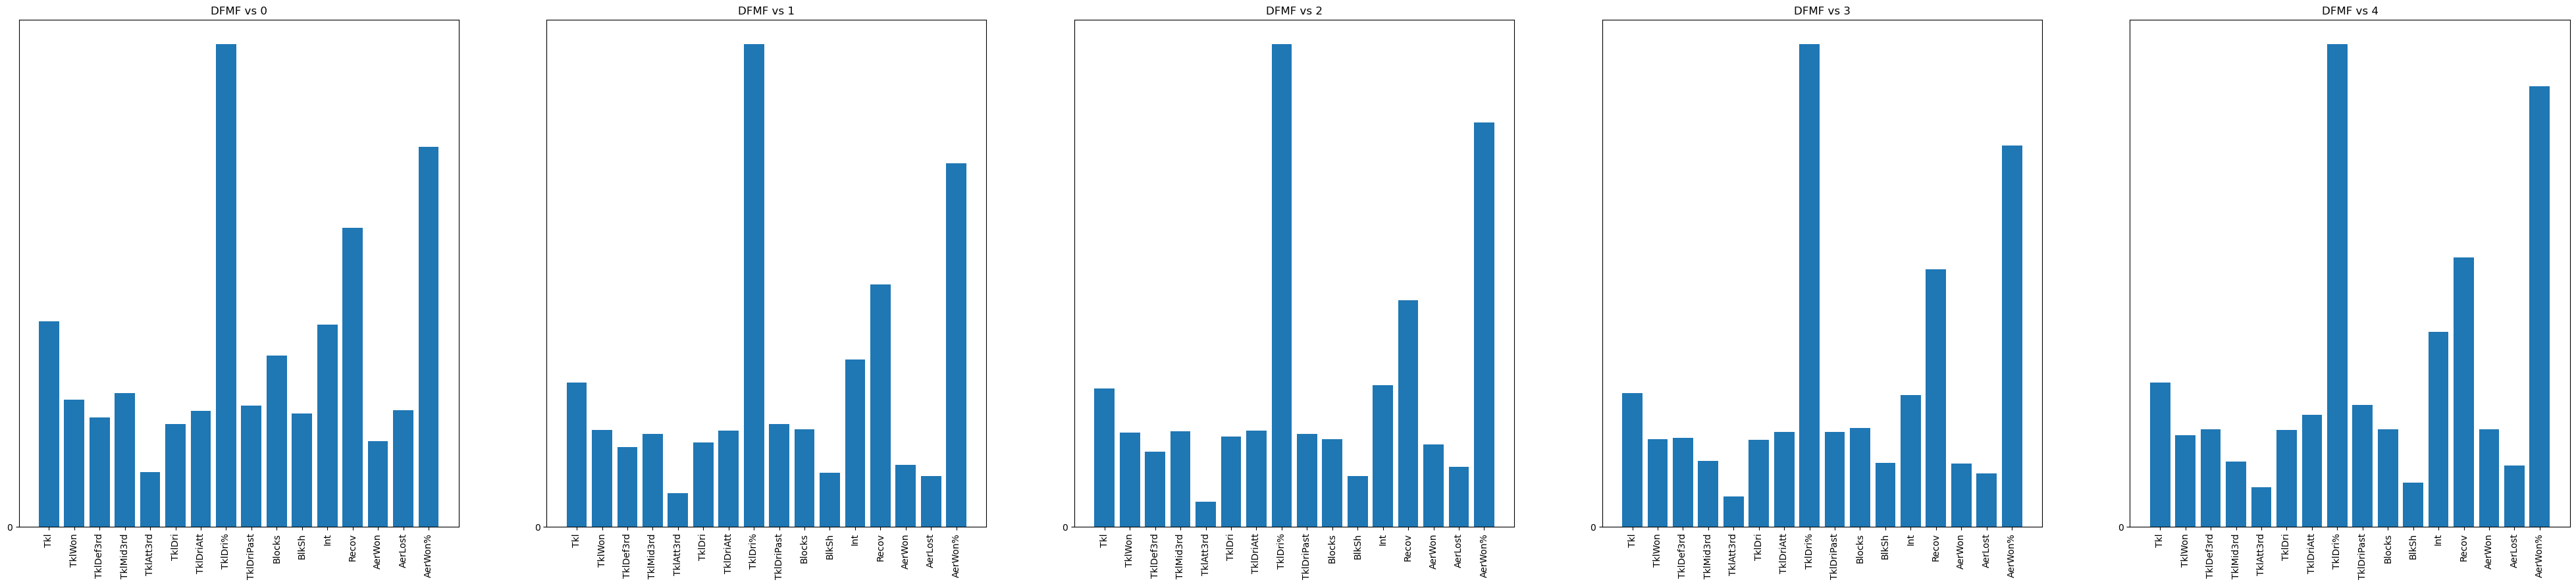

-
MP          19.6
Starts      18.6
Min       1527.0
dtype: float64
-
-
MP          9.833333
Starts      2.500000
Min       286.666667
dtype: float64
-
-
MP          18.285714
Starts      12.857143
Min       1127.142857
dtype: float64
-
-
MP         13.500000
Starts      6.833333
Min       691.333333
dtype: float64
-
-
MP          4.750000
Starts      0.833333
Min       103.250000
dtype: float64
-


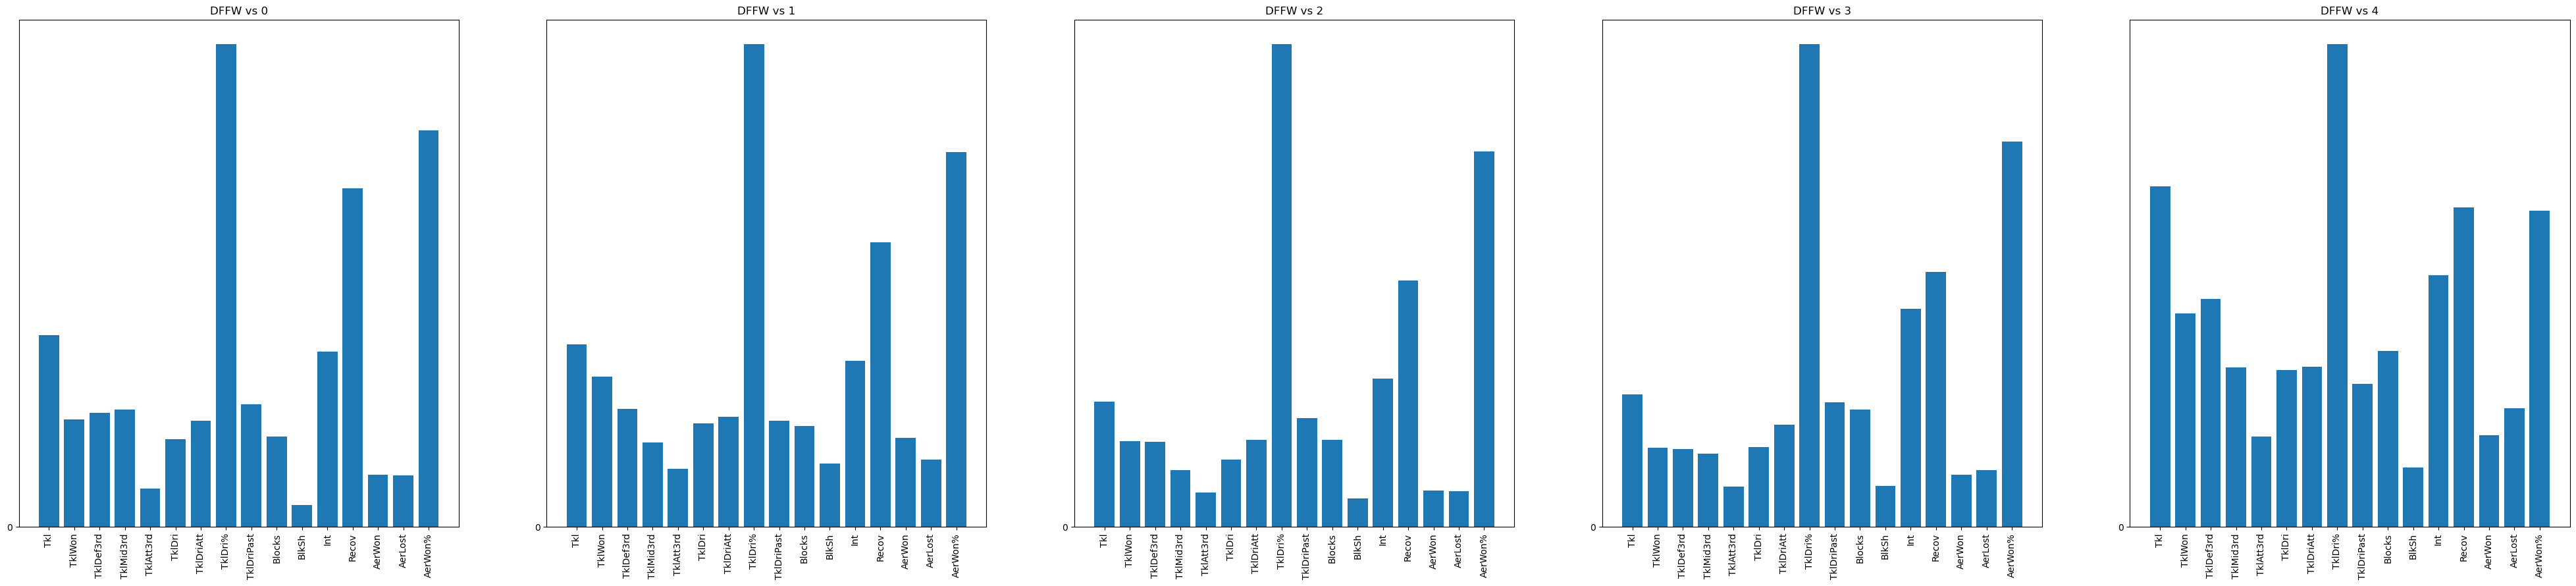

In [26]:
plot_class(defender_position, defender_features, playing_time, 1, df_radar)

Base on these, by doing eye test I come up with the following ranking for each position

In [27]:
ranking_dict = {
    "FW": [0, 2, 4, 1, 3],
    "FWMF": [4, 1, 2, 0, 3],
    "FWDF": [3, 0, 4, 2, 1],
    "MF": [1, 4, 3, 2, 0],
    "MFDF": [0, 2, 3, 4, 1],
    "MFFW": [1, 3, 2, 1, 4],
    "DF": [3, 4, 0, 1, 3],
    "DFMF": [0, 4, 3, 2, 1],
    "DFFW": [4, 1, 3, 2, 0]
}

In [28]:
color_ranking = ["green", "red", "purple", "steelblue", "gold"]

# Plotting

In [29]:
def get_info(player_name, attribute, df):
    '''
    Get information attribute given the player name and a list of attributes
    '''
    if player_name not in all_players:
        return "No player found"
    
    class_ranking = ranking_dict[list(df[df["Player"] == player_name]["Pos"].values)[0]]
    player_class = list(df[df["Player"] == player_name]["Class"].values)[0]
    color = class_ranking.index(player_class)
    
    return df[df["Player"] == player_name][attribute], color

def attribute_description(attribute):
    '''
    Get the description of each attribute inside the list
    '''
    description = []
    for i in range(len(attribute)):
        description.append(acronyms[attribute[i]])
    return description

def plot_players_right(player_name, attribute, df):
    '''
    Plot the player attribute given the player name, attribute, and desired year
    '''
    
    if player_name not in all_players:
        return "No player found"
    
    player, color = get_info(player_name, attribute, df)
    description = attribute_description(attribute)
    
    fig = go.Figure(go.Bar(
            x=player.values[0],
            y=description,
            orientation='h',
            marker=dict(
            color=color_ranking[color],
            line=dict(color='black', width=0.5)
        )))
    
    fig.update_layout(
        yaxis_title="Features",
        xaxis=dict(side='top'),
        plot_bgcolor='rgba(0,0,0,0)',
        bargap=0.1,
        height=500
    )
    
    fig.show()
    
def plot_players_left(player_name, attribute, df):
    '''
    Plot the player attribute given the player name, attribute, and desired year
    '''
    
    if player_name not in all_players:
        return "No player found"
    
    player, color = get_info(player_name, attribute, df)
    description = attribute_description(attribute)
    
    fig = go.Figure(go.Bar(
            x=player.values[0],
            y=description,
            orientation='h',
            marker=dict(
            color=color_ranking[color],
            line=dict(color='black', width=0.5)
        )))

    fig.update_layout(
        xaxis = dict(side='top', range=[max(player.values[0]), 0]),
        yaxis = dict(side='right'),
        plot_bgcolor='rgba(0,0,0,0)',
        bargap=0.1,
        height=500)

    fig.show()

def plot_radar(player_name,df):
    '''
    Plot radar chart
    '''
    
    if player_name not in all_players:
        return "No player found"
    
    player_info, color = get_info(player_name, goals_bestfeatures + passes_bestfeatures + skill_bestfeatures + defense_bestfeatures, df)
    
    new_column = attribute_description(player_info.columns)
    player_info.columns = new_column
    
    fig = px.line_polar(player_info, r=list(player_info.values[0]), theta=list(player_info.columns), line_close=True)
    fig.update_layout(polar=dict(radialaxis=dict(range=[0, 1], showticklabels=False)), plot_bgcolor='white')
    fig.update_traces(fill='toself', fillcolor=color_ranking[color], line_color='black', opacity=0.8)
    fig.show()

In [30]:
plot_players_right("Kylian Mbappé", forward_features, df_players)

In [31]:
plot_radar("Kylian Mbappé", df_radar)

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [32]:
plot_players_left("Erling Haaland", forward_features, df_players)

In [33]:
plot_radar("Erling Haaland", df_radar)

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

